# 100. Boston House Price Regression

- 보스턴 주택가격 예측

### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 종속변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 독립변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)  

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
boston = load_boston()
df_boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X = boston.data
y = boston.target

In [4]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [8]:
model = Sequential()

model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


- epoch 수와 batchz_size 변경하며 test

In [11]:
history = model.fit(X_train, y_train, batch_size=32, 
                    epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 30ms/step - loss: 609.3685 - mae: 22.7915 - mse: 609.3685 - val_loss: 485.7001 - val_mae: 20.5456 - val_mse: 485.7001
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 587.3601 - mae: 22.3003 - mse: 587.3601 - val_loss: 459.6568 - val_mae: 19.8877 - val_mse: 459.6568
Epoch 3/500
12/12 [==============================] - 0s 7ms/step - loss: 549.5331 - mae: 21.4186 - mse: 549.5331 - val_loss: 418.7202 - val_mae: 18.7906 - val_mse: 418.7202
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 495.3276 - mae: 20.0870 - mse: 495.3276 - val_loss: 363.7524 - val_mae: 17.1842 - val_mse: 363.7524
Epoch 5/500
12/12 [==============================] - 0s 7ms/step - loss: 424.6727 - mae: 18.1530 - mse: 424.6727 - val_loss: 294.1234 - val_mae: 14.9533 - val_mse: 294.1234
Epoch 6/500
12/12 [==============================] - 0s 7ms/step - loss: 337.6743 - mae: 15.5557 - mse: 337.6743 - val_loss: 217.5502 

Epoch 98/500
12/12 [==============================] - 0s 7ms/step - loss: 18.9741 - mae: 3.0204 - mse: 18.9741 - val_loss: 14.9830 - val_mae: 2.8851 - val_mse: 14.9830
Epoch 99/500
12/12 [==============================] - 0s 6ms/step - loss: 18.3212 - mae: 2.9008 - mse: 18.3212 - val_loss: 13.7599 - val_mae: 2.6607 - val_mse: 13.7599
Epoch 100/500
12/12 [==============================] - 0s 6ms/step - loss: 18.1091 - mae: 2.8629 - mse: 18.1091 - val_loss: 13.9142 - val_mae: 2.7345 - val_mse: 13.9142
Epoch 101/500
12/12 [==============================] - 0s 6ms/step - loss: 18.0924 - mae: 2.8744 - mse: 18.0924 - val_loss: 13.7900 - val_mae: 2.7075 - val_mse: 13.7900
Epoch 102/500
12/12 [==============================] - 0s 6ms/step - loss: 17.9535 - mae: 2.8598 - mse: 17.9535 - val_loss: 14.3663 - val_mae: 2.7902 - val_mse: 14.3663
Epoch 103/500
12/12 [==============================] - 0s 7ms/step - loss: 17.9572 - mae: 2.8778 - mse: 17.9572 - val_loss: 13.7696 - val_mae: 2.7000 - val_m

12/12 [==============================] - 0s 7ms/step - loss: 12.1135 - mae: 2.2950 - mse: 12.1135 - val_loss: 10.5706 - val_mae: 2.4027 - val_mse: 10.5706
Epoch 195/500
12/12 [==============================] - 0s 7ms/step - loss: 11.9069 - mae: 2.3536 - mse: 11.9069 - val_loss: 10.9822 - val_mae: 2.4881 - val_mse: 10.9822
Epoch 196/500
12/12 [==============================] - 0s 7ms/step - loss: 11.9788 - mae: 2.3076 - mse: 11.9788 - val_loss: 10.7180 - val_mae: 2.4069 - val_mse: 10.7180
Epoch 197/500
12/12 [==============================] - 0s 7ms/step - loss: 11.8251 - mae: 2.3199 - mse: 11.8251 - val_loss: 11.0486 - val_mae: 2.5255 - val_mse: 11.0486
Epoch 198/500
12/12 [==============================] - 0s 7ms/step - loss: 11.8047 - mae: 2.3129 - mse: 11.8047 - val_loss: 10.5234 - val_mae: 2.3495 - val_mse: 10.5234
Epoch 199/500
12/12 [==============================] - 0s 7ms/step - loss: 11.8205 - mae: 2.2925 - mse: 11.8205 - val_loss: 10.5317 - val_mae: 2.3926 - val_mse: 10.5317


12/12 [==============================] - 0s 6ms/step - loss: 9.2581 - mae: 2.0941 - mse: 9.2581 - val_loss: 9.7165 - val_mae: 2.2095 - val_mse: 9.7165
Epoch 292/500
12/12 [==============================] - 0s 6ms/step - loss: 9.3877 - mae: 2.0729 - mse: 9.3877 - val_loss: 10.4316 - val_mae: 2.4290 - val_mse: 10.4316
Epoch 293/500
12/12 [==============================] - 0s 6ms/step - loss: 9.4224 - mae: 2.1281 - mse: 9.4224 - val_loss: 9.7761 - val_mae: 2.1802 - val_mse: 9.7761
Epoch 294/500
12/12 [==============================] - 0s 7ms/step - loss: 9.3545 - mae: 2.0920 - mse: 9.3545 - val_loss: 10.1836 - val_mae: 2.4039 - val_mse: 10.1836
Epoch 295/500
12/12 [==============================] - 0s 6ms/step - loss: 9.1759 - mae: 2.0549 - mse: 9.1759 - val_loss: 9.6587 - val_mae: 2.2421 - val_mse: 9.6587
Epoch 296/500
12/12 [==============================] - 0s 6ms/step - loss: 9.0602 - mae: 2.0366 - mse: 9.0602 - val_loss: 9.7667 - val_mae: 2.2952 - val_mse: 9.7667
Epoch 297/500
12/12 

Epoch 390/500
12/12 [==============================] - 0s 6ms/step - loss: 7.9159 - mae: 1.9473 - mse: 7.9159 - val_loss: 9.1737 - val_mae: 2.1416 - val_mse: 9.1737
Epoch 391/500
12/12 [==============================] - 0s 7ms/step - loss: 7.7809 - mae: 1.9277 - mse: 7.7809 - val_loss: 9.3372 - val_mae: 2.2161 - val_mse: 9.3372
Epoch 392/500
12/12 [==============================] - 0s 7ms/step - loss: 7.7331 - mae: 1.9058 - mse: 7.7331 - val_loss: 9.2650 - val_mae: 2.1559 - val_mse: 9.2650
Epoch 393/500
12/12 [==============================] - 0s 7ms/step - loss: 7.9017 - mae: 1.9296 - mse: 7.9017 - val_loss: 9.8787 - val_mae: 2.3432 - val_mse: 9.8787
Epoch 394/500
12/12 [==============================] - 0s 7ms/step - loss: 7.7214 - mae: 1.9125 - mse: 7.7214 - val_loss: 9.2817 - val_mae: 2.1474 - val_mse: 9.2817
Epoch 395/500
12/12 [==============================] - 0s 6ms/step - loss: 7.8761 - mae: 1.9570 - mse: 7.8761 - val_loss: 9.5276 - val_mae: 2.2591 - val_mse: 9.5276
Epoch 396/

Epoch 489/500
12/12 [==============================] - 0s 6ms/step - loss: 6.9794 - mae: 1.8195 - mse: 6.9794 - val_loss: 9.0385 - val_mae: 2.1419 - val_mse: 9.0385
Epoch 490/500
12/12 [==============================] - 0s 6ms/step - loss: 6.7302 - mae: 1.7993 - mse: 6.7302 - val_loss: 9.1041 - val_mae: 2.2116 - val_mse: 9.1041
Epoch 491/500
12/12 [==============================] - 0s 6ms/step - loss: 6.9353 - mae: 1.8232 - mse: 6.9353 - val_loss: 9.0034 - val_mae: 2.1374 - val_mse: 9.0034
Epoch 492/500
12/12 [==============================] - 0s 6ms/step - loss: 6.7212 - mae: 1.7961 - mse: 6.7212 - val_loss: 8.9914 - val_mae: 2.1436 - val_mse: 8.9914
Epoch 493/500
12/12 [==============================] - 0s 6ms/step - loss: 6.9620 - mae: 1.8361 - mse: 6.9620 - val_loss: 9.9256 - val_mae: 2.3804 - val_mse: 9.9256
Epoch 494/500
12/12 [==============================] - 0s 6ms/step - loss: 6.9628 - mae: 1.8535 - mse: 6.9628 - val_loss: 9.1663 - val_mae: 2.2006 - val_mse: 9.1663
Epoch 495/

In [12]:
model.evaluate(X_test, y_test, verbose=0)

[9.468721389770508, 2.2988078594207764, 9.468721389770508]

In [13]:
y_pred = model.predict(X_test)

In [14]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 9.47
R2 score: 0.85


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

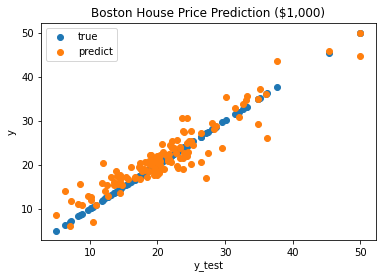

In [15]:
plt.scatter(y_test, y_test, label='true')
plt.scatter(y_test, y_pred, label='predict')
plt.xlabel('y_test')
plt.ylabel('y')
plt.legend()
plt.title('Boston House Price Prediction ($1,000)')

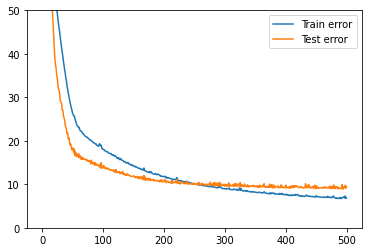

In [16]:
plt.plot(history.history['mse'], label='Train error')
plt.plot(history.history['val_mse'], label='Test error')
plt.ylim([0, 50])
plt.legend()

## sklearn LinearRegression 비교

In [17]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [18]:
regr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regr.predict(X_test)

In [20]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [-11.47105481   4.14565091  -0.03250034   3.12634039  -7.27716489
  19.06646665  -0.48722891 -15.20479568   7.17695138  -6.53026378
  -8.64651835   4.29271567 -17.57703967]
Intercept: 
 26.205927498106302


In [21]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 30.14
R2 score: 0.71


In [22]:
y_test.shape, y_pred.shape

((127,), (127,))

Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

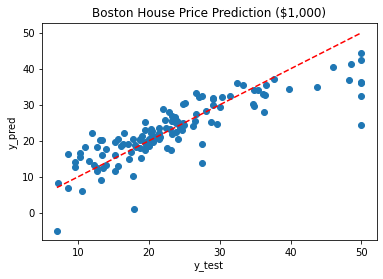

In [23]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression model 작성

- auto-mpg.data - data file  


- auto-mpg.names - data 설명 file

    1. mpg:           continuous  
    2. cylinders:     multi-valued discrete  
    3. displacement:  continuous (배기량)   
    4. horsepower:    continuous  
    5. weight:        continuous  
    6. acceleration:  continuous  
    7. model year:    multi-valued discrete  
    8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
    9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [ ]:
data_path = tf.keras.utils.get_file("auto-mpg.data", 
        "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Regression Model Build

### train

### predict

### $r^2$ 계산

### 시각화